## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management 

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [2]:
#import dataset
amazon_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [3]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

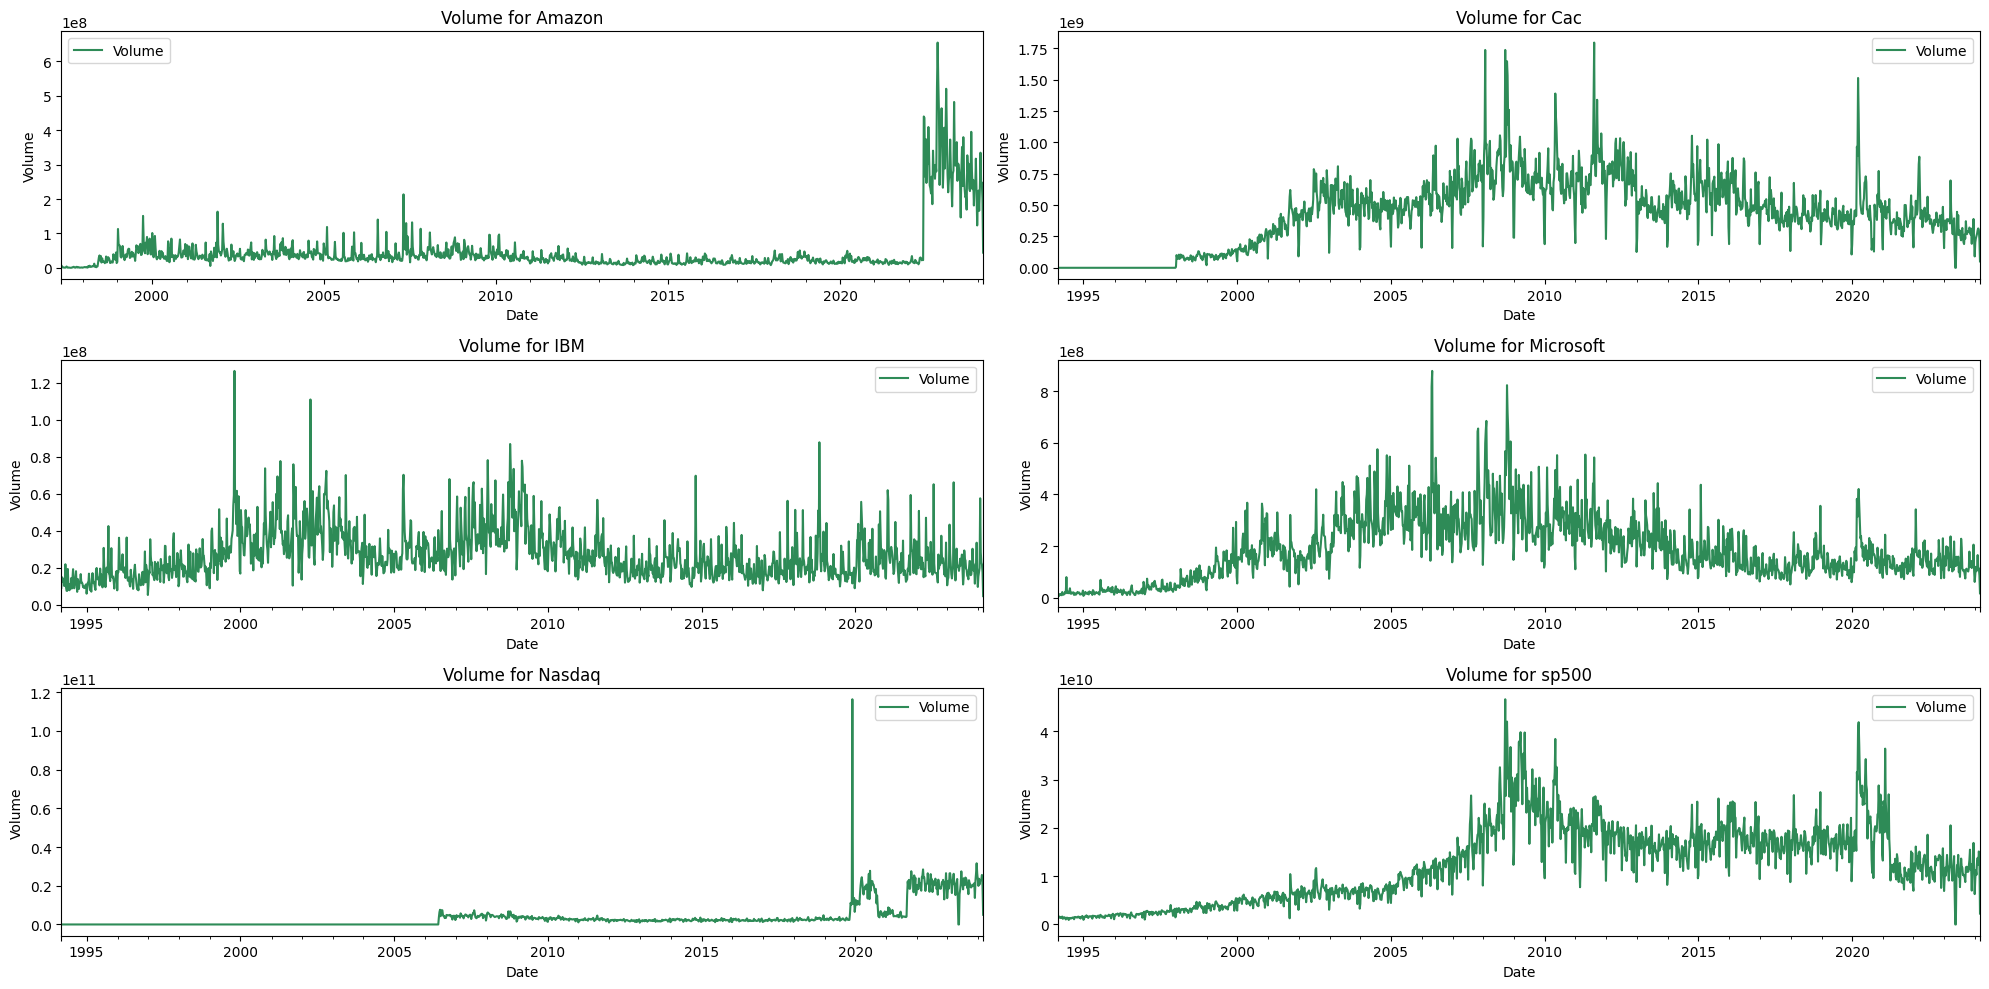

In [4]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [5]:
nasdaq_df[nasdaq_df.Volume !=0].head()

,Date,Open,High,Low,Close,Volume
641,2006-06-18,2137.47,2147.91,2065.11,2129.95,3590464523
642,2006-06-25,2136.60,2152.56,2103.77,2121.47,6356132033
643,2006-07-02,2126.46,2183.48,2090.78,2172.09,7589173242
644,2006-07-09,2177.91,2190.44,2126.64,2130.06,4263156577
645,2006-07-16,2135.96,2142.36,2027.11,2037.35,6692935710


In [6]:
cac_df[cac_df.Volume !=0].head()

,Date,Open,High,Low,Close,Volume
200,1998-01-04,2888.63,3048.00,2888.63,3040.14,6752690.0
201,1998-01-11,3023.43,3075.30,2902.13,2919.81,101046353.0
202,1998-01-18,2830.97,2976.85,2809.73,2976.09,78855452.0
203,1998-01-25,3004.86,3016.81,2944.29,2966.15,71560128.0
204,1998-02-01,2992.54,3173.98,2961.90,3172.14,86885992.0


Problem with Volumes:
- for nasdaq, it's 0 before 2006.
- for caa, it's 0 before 1998

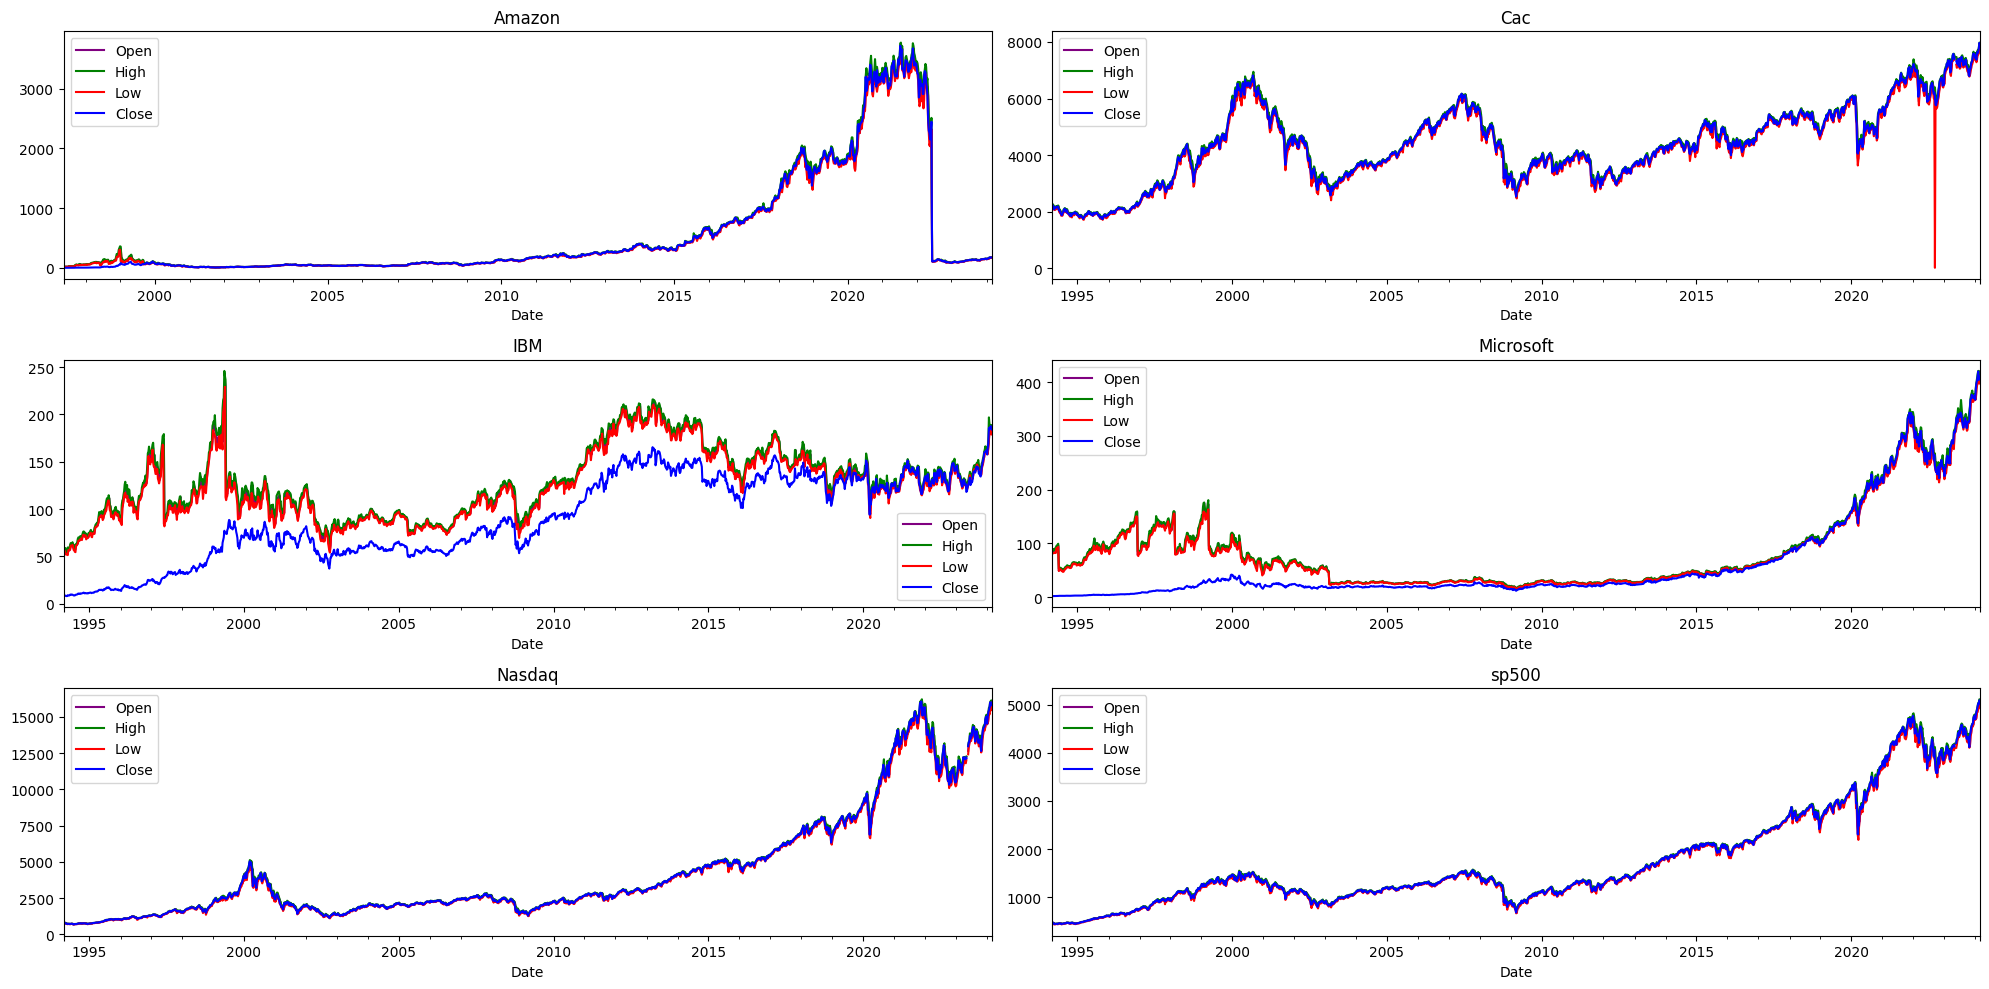

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. We replace it from Yahoo finance.

In [8]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

In [9]:
#fillna cac
cac_df[cac_df['Close'].isna()]

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [10]:
#fillna nasdaq
nasdaq_df[nasdaq_df['Close'].isna()]

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [11]:
#fillna sp500
sp500_df[sp500_df['Close'].isna()]

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

In [12]:
#fillna amazon
amazon_df[amazon_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume


In [13]:
#fillna ibm
ibm_df[ibm_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume


In [14]:
#fillna microsoft
microsoft_df[microsoft_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume


Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

In [15]:
amazon_df.loc[amazon_df['Date']>=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']] = amazon_df.loc[amazon_df['Date']<pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]*20

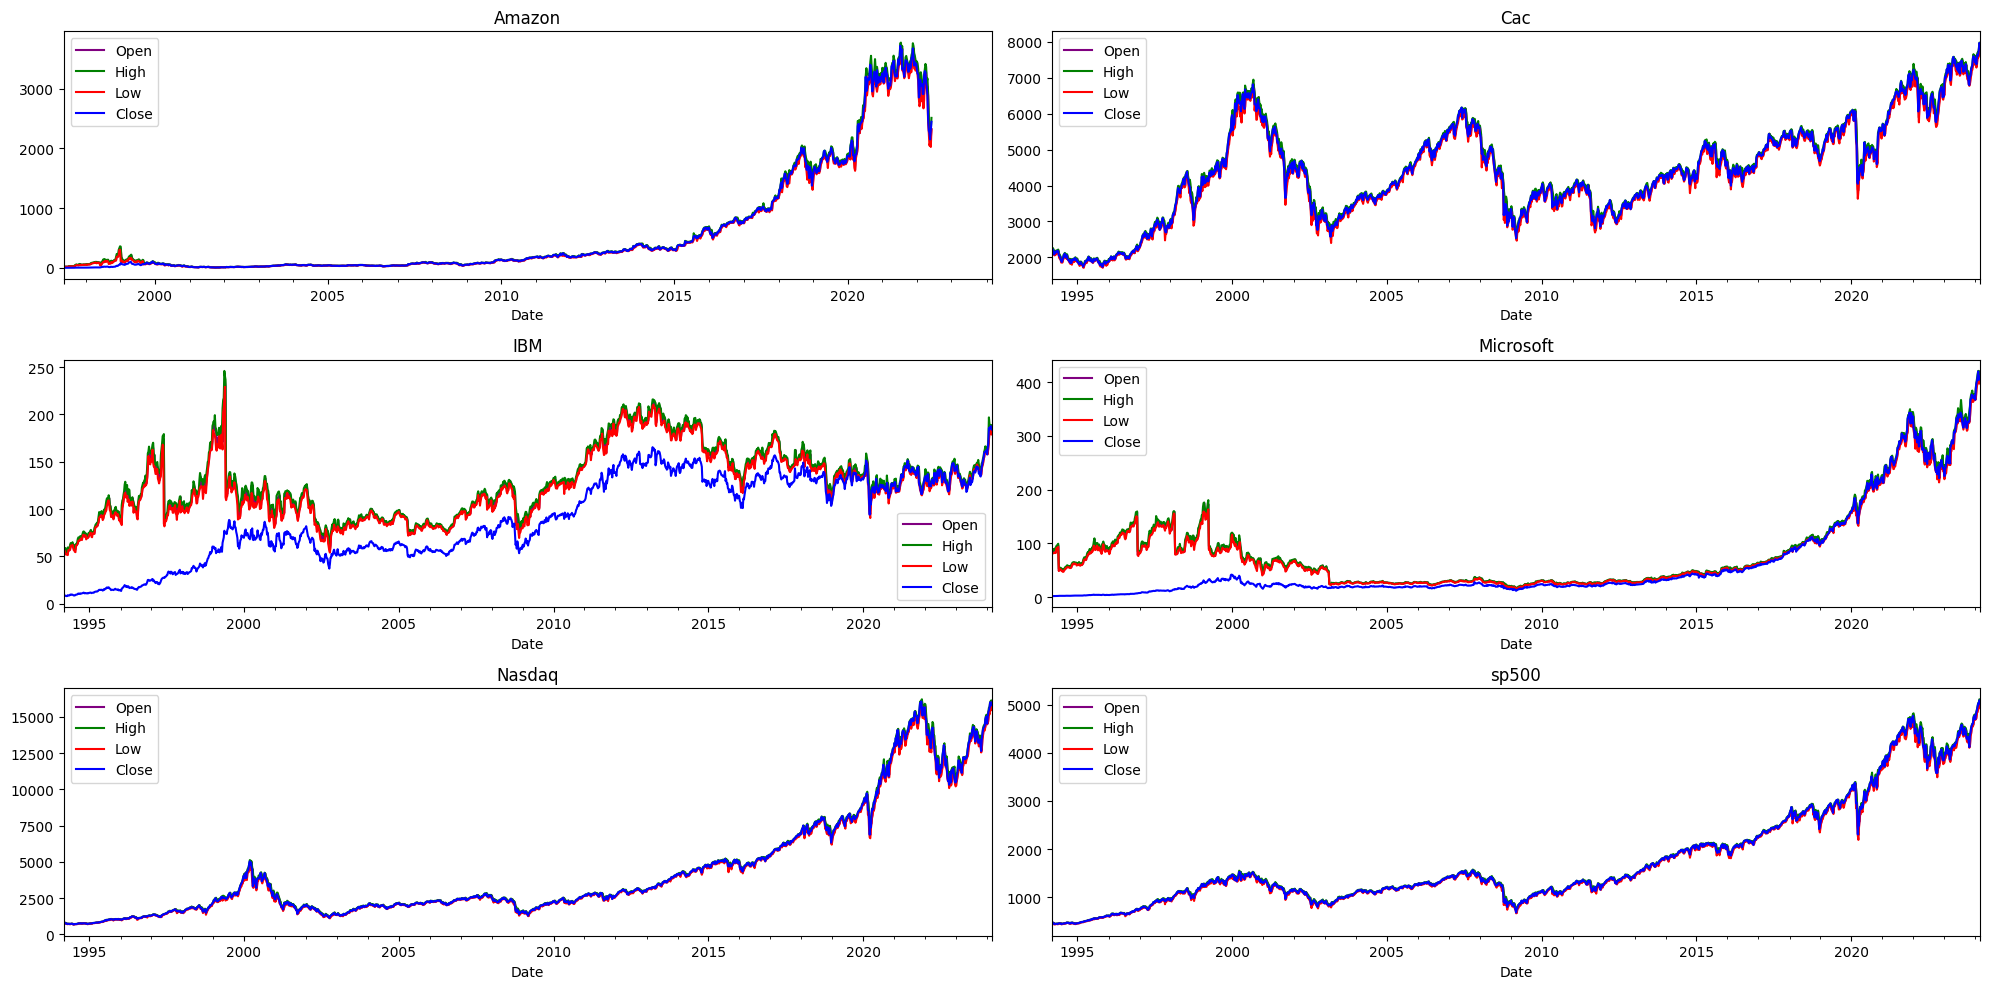

In [16]:
#check after our cleaning
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [17]:
#investigate missing values for the datasets
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

for df in dfs:
    df.dropna(inplace=True)

DataFrame: Amazon
           Date  Open  High  Low  Close     Volume
1308 2022-06-12   NaN   NaN  NaN    NaN  439648156
1309 2022-06-19   NaN   NaN  NaN    NaN  435602864
1310 2022-06-26   NaN   NaN  NaN    NaN  265079681
1311 2022-07-03   NaN   NaN  NaN    NaN  374172769
1312 2022-07-10   NaN   NaN  NaN    NaN  246721340
...         ...   ...   ...  ...    ...        ...
1394 2024-02-04   NaN   NaN  NaN    NaN  334522911
1395 2024-02-11   NaN   NaN  NaN    NaN  244063321
1396 2024-02-18   NaN   NaN  NaN    NaN  248174038
1397 2024-02-25   NaN   NaN  NaN    NaN  201663539
1398 2024-03-03   NaN   NaN  NaN    NaN   44368614

[91 rows x 6 columns]


Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [18]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon           Date      Open      High      Low    Close    Volume
0   1997-05-18   18.0000   30.0000   18.000   1.7292   7238000
1   1997-05-25   21.1250   21.2500   15.750   1.5000   4836500
2   1997-06-01   18.1250   19.7500   17.500   1.5000   1611600
3   1997-06-08   18.1250   20.5000   16.500   1.6563   1527900
4   1997-06-15   19.8750   20.5000   18.375   1.5834    943700
..         ...       ...       ...      ...      ...       ...
115 1999-08-01  110.4375  115.5000   97.500  50.0313  55493000
116 1999-08-08   98.3750  102.1250   82.000  44.7813  63627000
117 1999-08-15   91.5000   97.4375   82.000  48.7188  42908500
118 1999-08-22   98.2500  117.5000   95.500  56.7188  48701800
119 1999-08-29  115.9375  135.5625  115.750  64.2500  48662200

[120 rows x 6 columns]
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    

SUM UP for Close<Low: 
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [19]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [20]:
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()
 
#standardization of the prices
for df in dfs:
    df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(df[['Close', 'Open', 'Low', 'High']])

#question: is it better to use RobustScaler to transform the volume? Take a look at it and try whether the performance is then getting better.

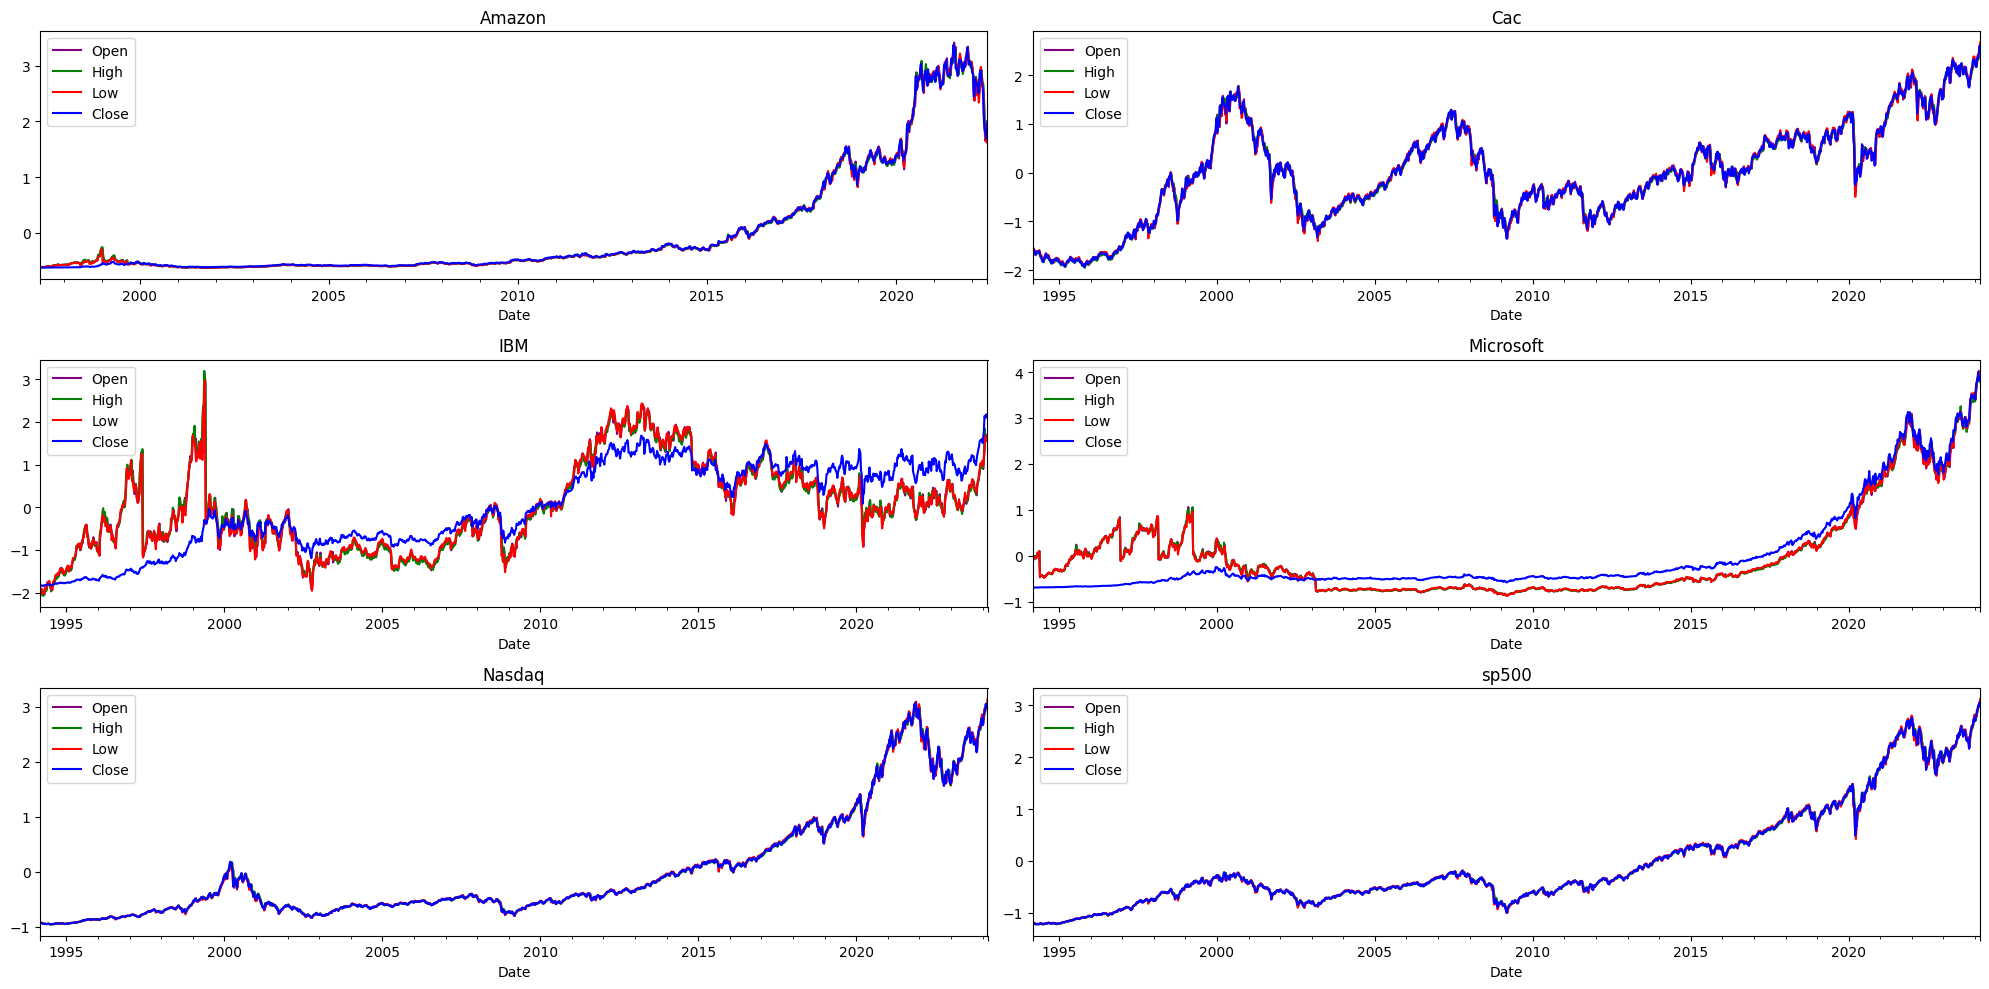

In [21]:
#plots with standardized prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

#scaler
scaler = MinMaxScaler()
 
#standardization of the prices
for df in dfs:
    df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_98331/1508119283.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.03198926 0.0207217  0.00559085 ... 0.10217475 0.11267247 0.10483481]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])
/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_98331/1508119283.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.03643307 0.08431023 0.06392206 ... 0.14067079 0.10569937 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])
/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_98331/1508119283.py:8: Future

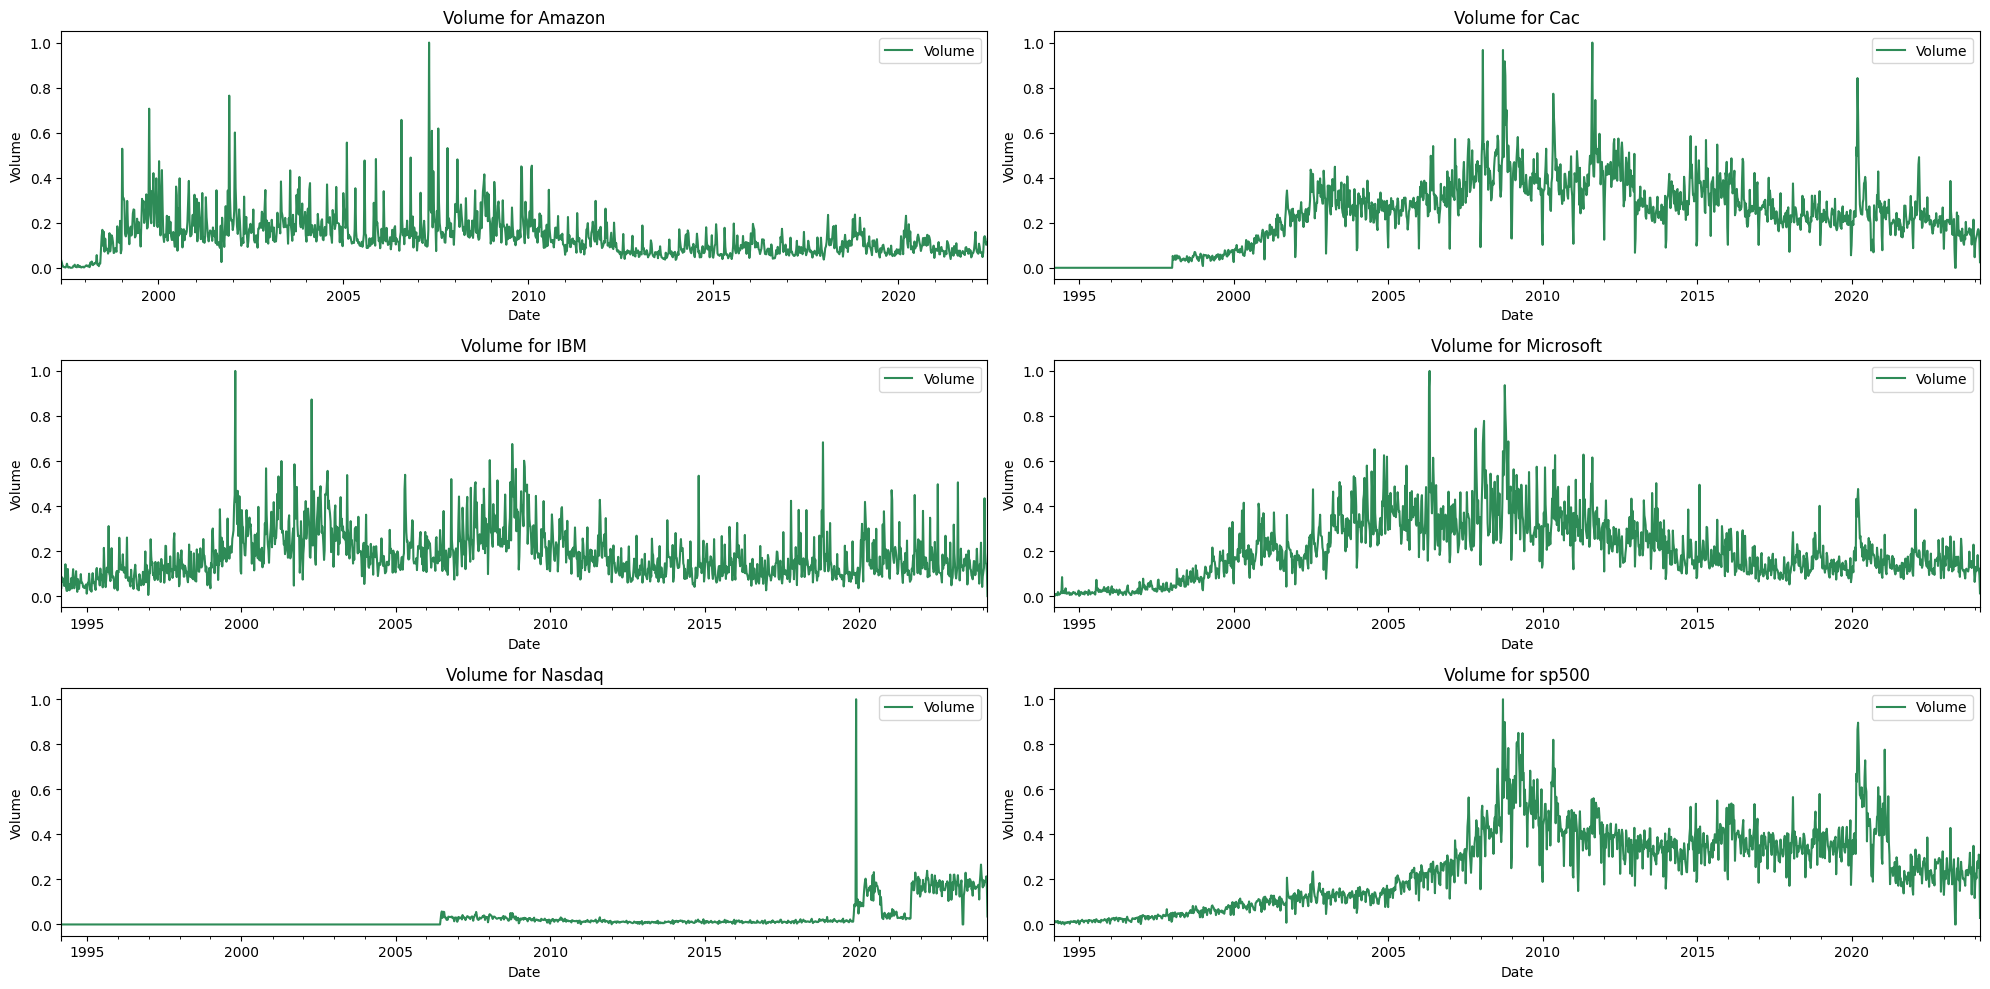

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [30]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [31]:
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA40'] = df['Close'].rolling(window=40).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

## INDEX

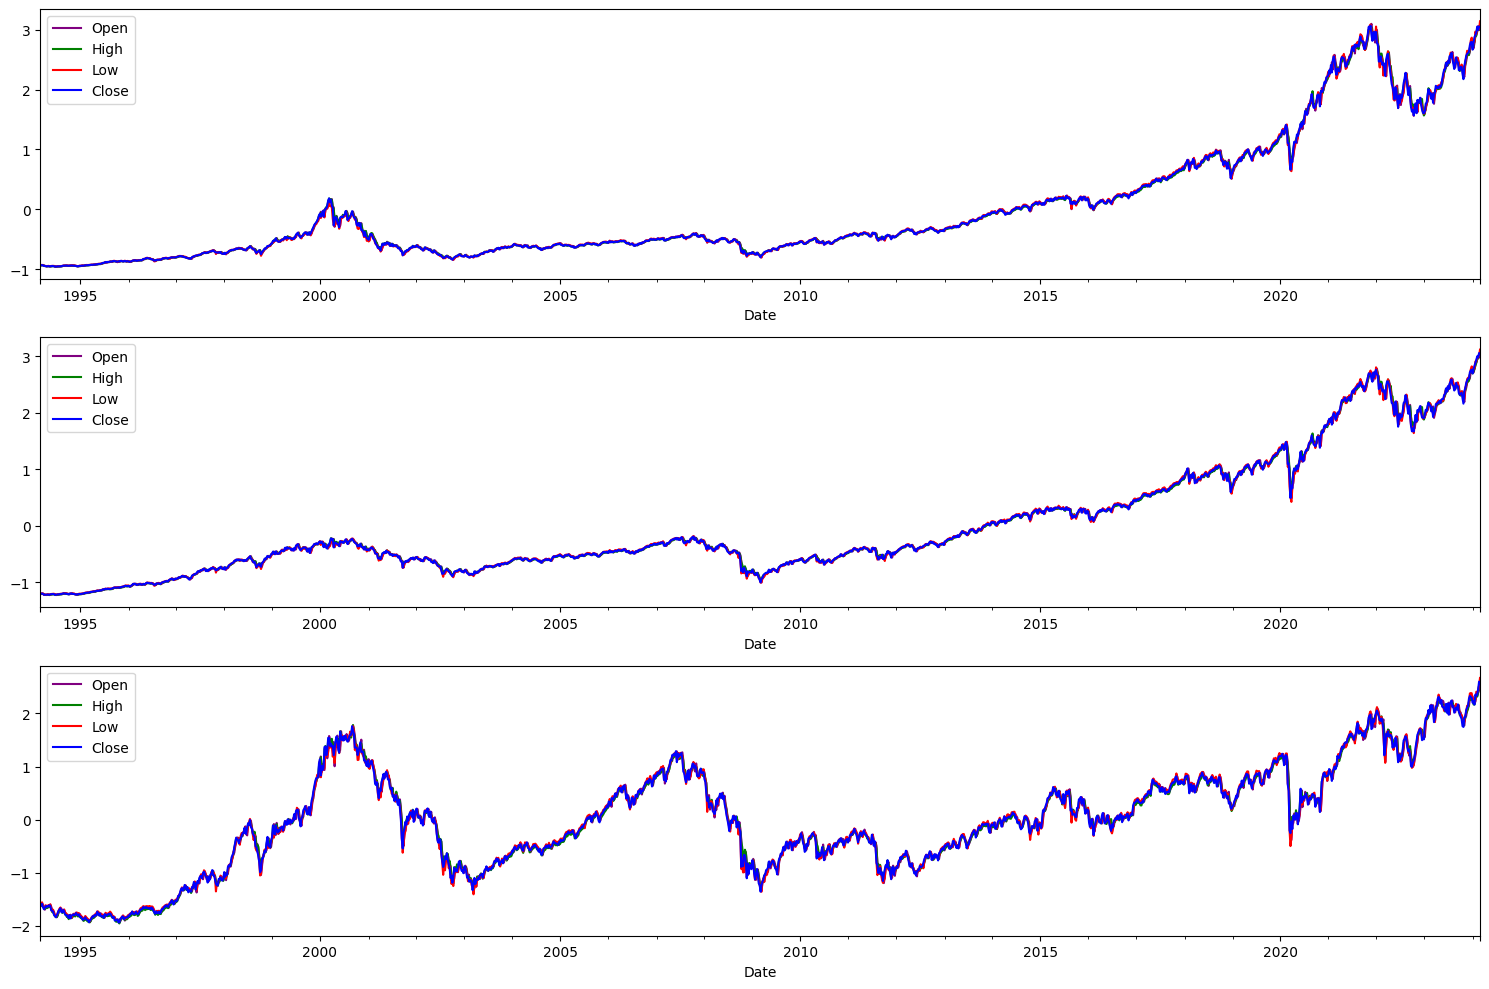

In [26]:
dfs_1 = [nasdaq_df, sp500_df, cac_df]
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
        dfs_1[i].plot(x='Date', y='Open', ax=axs[i], color = 'purple')
        dfs_1[i].plot(x='Date', y='High', ax=axs[i], color = 'green')
        dfs_1[i].plot(x='Date', y='Low', ax=axs[i], color = 'red')
        dfs_1[i].plot(x='Date', y='Close', ax=axs[i], color = 'blue')
plt.tight_layout()
plt.show()

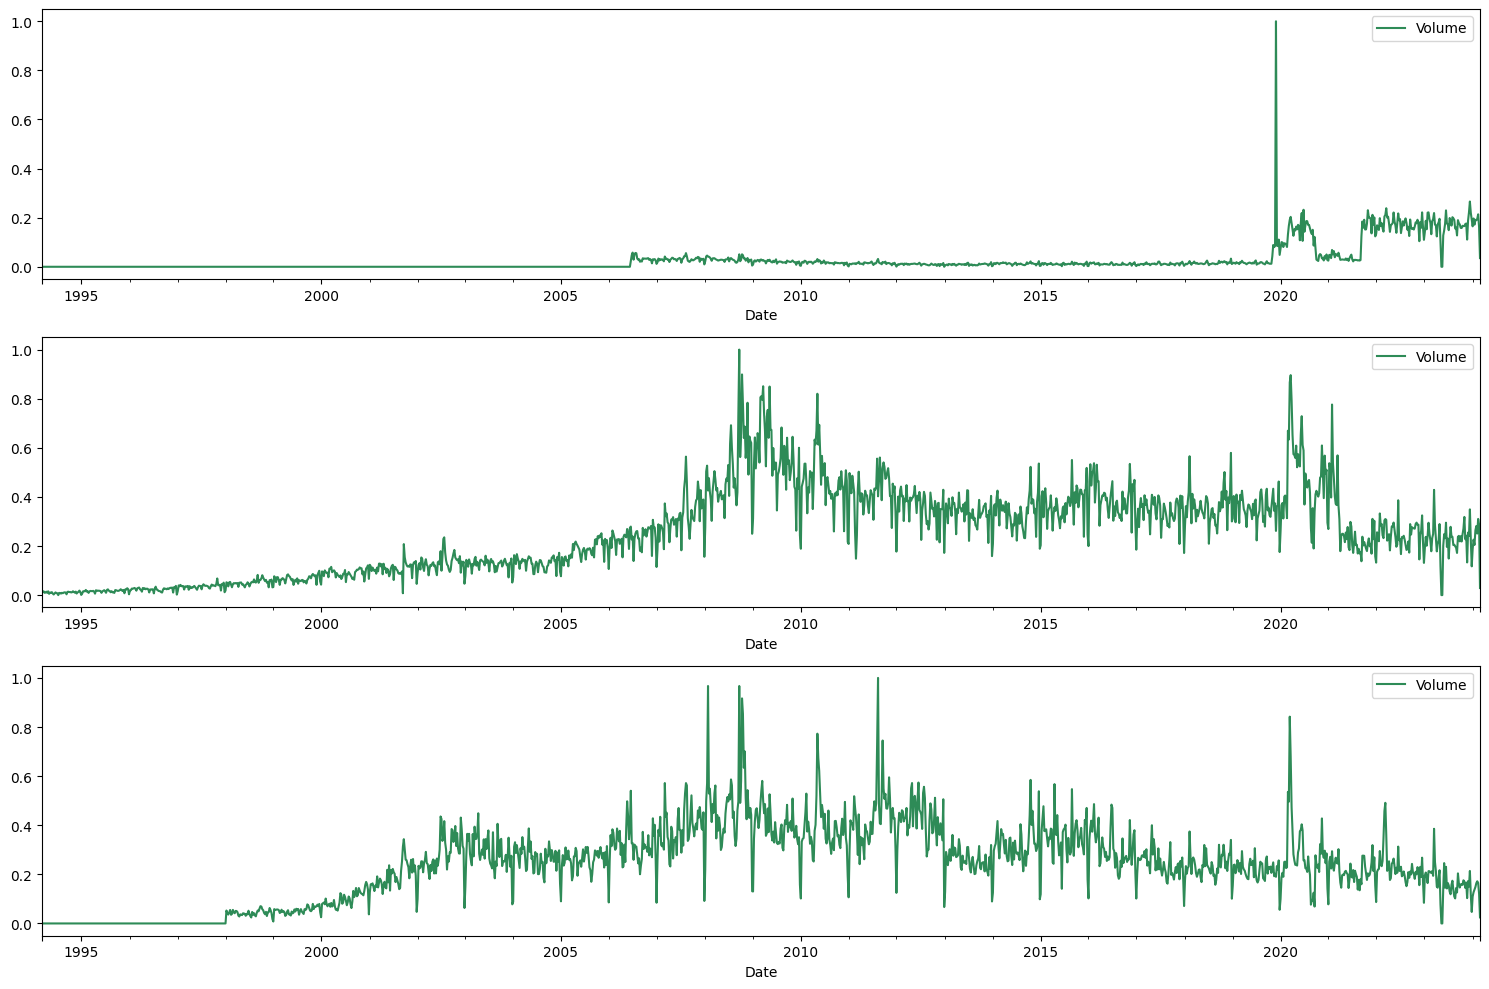

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
        dfs_1[i].plot(x='Date', y='Volume', ax=axs[i], color = 'seagreen')
plt.tight_layout()
plt.show()

In [33]:
#split train and test
from sklearn.model_selection import train_test_split
nasdaq_train, nasdaq_test = train_test_split(nasdaq_df, test_size=0.2, random_state=42)
sp500_train, sp500_test = train_test_split(sp500_df, test_size=0.2, random_state=42)
cac_train, cac_test = train_test_split(cac_df, test_size=0.2, random_state=42)

In [29]:
STOP

NameError: name 'STOP' is not defined

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


Fan Speed: 47.61006289308178
